In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [7]:
df = pd.read_csv('winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
x = df.drop(columns='quality')
y = df['quality']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3)

In [12]:
x_train.shape

(1119, 11)

In [13]:
x_test.shape 

(480, 11)

In [16]:
mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.02243128, 0.13027603, 0.07891496, 0.04580554, 0.03851999,
       0.04051993, 0.1094876 , 0.07068311, 0.02872373, 0.10015182,
       0.20542107])

In [21]:
mutual_info = pd.Series(mutual_info)
# mutual_info.index
mutual_info.index = x_train.columns

In [22]:
mutual_info

fixed acidity           0.022431
volatile acidity        0.130276
citric acid             0.078915
residual sugar          0.045806
chlorides               0.038520
free sulfur dioxide     0.040520
total sulfur dioxide    0.109488
density                 0.070683
pH                      0.028724
sulphates               0.100152
alcohol                 0.205421
dtype: float64

In [23]:
mutual_info.sort_values(ascending=False)

alcohol                 0.205421
volatile acidity        0.130276
total sulfur dioxide    0.109488
sulphates               0.100152
citric acid             0.078915
density                 0.070683
residual sugar          0.045806
free sulfur dioxide     0.040520
chlorides               0.038520
pH                      0.028724
fixed acidity           0.022431
dtype: float64

In [24]:
mutual_info.index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [25]:
mutual_info.values

array([0.02243128, 0.13027603, 0.07891496, 0.04580554, 0.03851999,
       0.04051993, 0.1094876 , 0.07068311, 0.02872373, 0.10015182,
       0.20542107])

<BarContainer object of 11 artists>

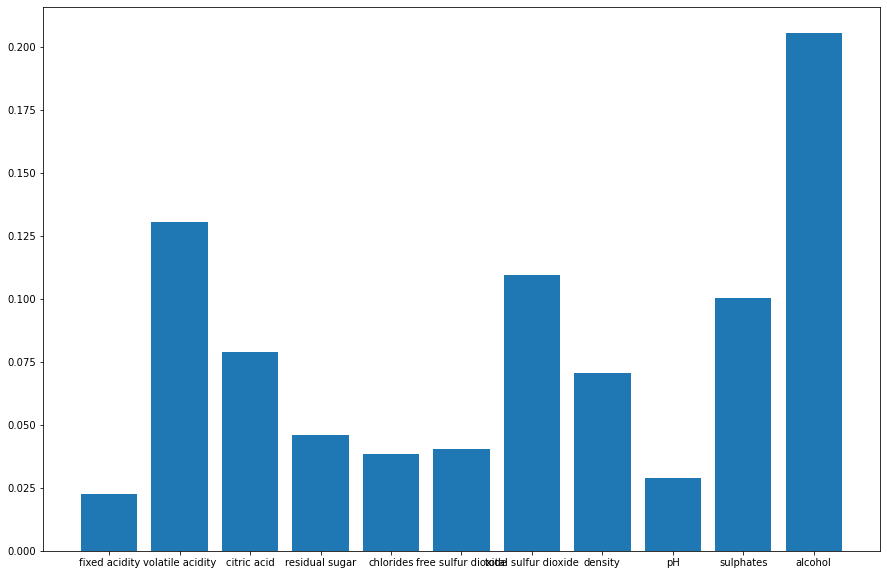

In [27]:

plt.figure(figsize=(15,10))

plt.bar(mutual_info.index,mutual_info.values)



In [28]:
# try to select the most 5 important feature by using informaton gain

In [29]:
from sklearn.feature_selection import SelectKBest


In [31]:
slt_five = SelectKBest(mutual_info_classif,k=5)
slt_five.fit(x_train,y_train)
x_train.columns[slt_five.get_support()]

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')